## Placement Decision Tree

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from IPython.display import Image
import graphviz
import pydotplus

In [2]:
cd D:/Michigan Tech/Projects/Placement_DecisionTree

D:\Michigan Tech\Projects\Placement_DecisionTree


In [3]:
# Import the data CSV file
data = pd.read_csv('Placement_Data_Full_Class.csv')
data.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# Check null values
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Salary is the field that has 67 null values and we do not think it is a very useful factor so we will remove it.

In [5]:
data = data.drop(columns=['salary', 'sl_no'])
categorical_features = data.select_dtypes(include=['object']).copy()
numerical_features = data.select_dtypes(exclude=['object']).copy()

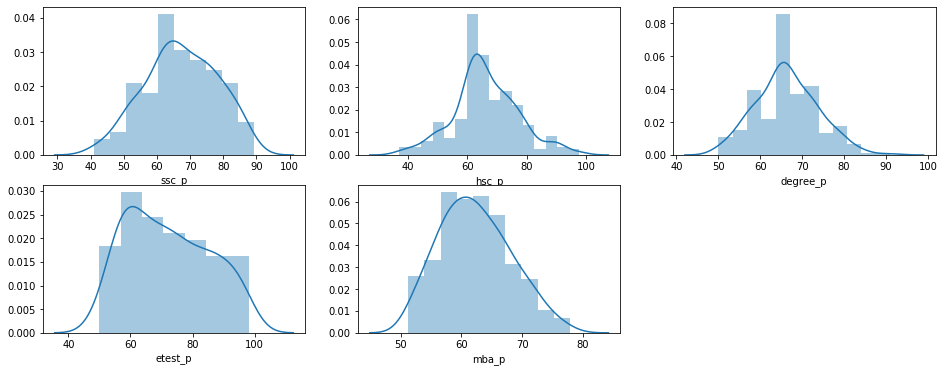

In [6]:
# Distribution plot for numerical features
i=1
plt.figure(figsize=(16,6)) 
for c in numerical_features.columns:
    plt.subplot(2,3,i)
    sns.distplot(numerical_features[c])
    i+=1

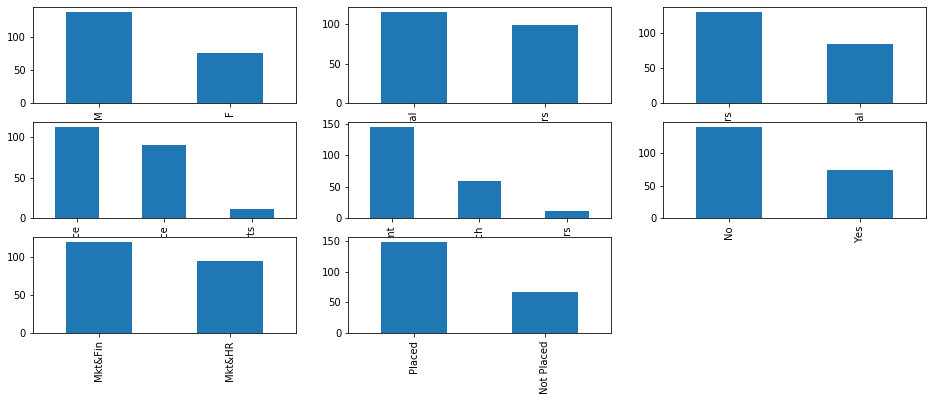

In [7]:
# Bar plot for categorical features
i=1
plt.figure(figsize=(16,6)) 
for c in categorical_features.columns:
    plt.subplot(3,3,i)
    categorical_features[c].value_counts().plot(kind='bar')
    i+=1

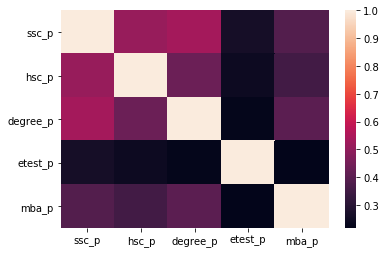

In [69]:
data_enc = pd.get_dummies(data, drop_first=True)
sns.heatmap(data.corr(method='pearson'))

Text(0.5, 1.0, 'Specialisation | Placed')

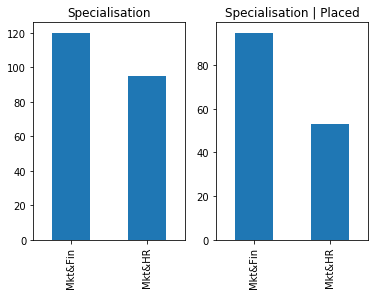

In [70]:
plt.subplot(121)
categorical_features['specialisation'].value_counts().plot(kind='bar')
plt.title('Specialisation')
plt.subplot(122)
categorical_features[categorical_features['status']=='Placed'].specialisation.value_counts().plot(kind='bar')
plt.title('Specialisation | Placed')

In [65]:
data.ssc_b.unique()
for c in categorical_features.columns:
    if c != 'status':
        print('-'*50)
        print(c)
        print('-'*50)
        print(categorical_features[c].value_counts()*100/len(categorical_features))
        print('\n- GIVEN PLACED:')
        print(categorical_features[categorical_features.status=='Placed'][c].value_counts()*100/len(categorical_features[categorical_features.status=='Placed']))

--------------------------------------------------
gender
--------------------------------------------------
M    64.651163
F    35.348837
Name: gender, dtype: float64

- GIVEN PLACED:
M    67.567568
F    32.432432
Name: gender, dtype: float64
--------------------------------------------------
ssc_b
--------------------------------------------------
Central    53.953488
Others     46.046512
Name: ssc_b, dtype: float64

- GIVEN PLACED:
Central    52.702703
Others     47.297297
Name: ssc_b, dtype: float64
--------------------------------------------------
hsc_b
--------------------------------------------------
Others     60.930233
Central    39.069767
Name: hsc_b, dtype: float64

- GIVEN PLACED:
Others     61.486486
Central    38.513514
Name: hsc_b, dtype: float64
--------------------------------------------------
hsc_s
--------------------------------------------------
Commerce    52.558140
Science     42.325581
Arts         5.116279
Name: hsc_s, dtype: float64

- GIVEN PLACED:
Commerc

From the above table we can observe that Workex has a high correlation with the placement. Also, people with Marketing and Finance specialisation seems to have a higher posibility of getting placed. There is also a slight indication that males got placed more than females. However, the difference is minimal and we need to further investigation before any comment.

In [ ]:
data.ssc_b.unique()
for c in categorical_features.columns:
    if c == 'gender':
        print('-'*50)
        print(c)
        print('-'*50)
        print(categorical_features[c].value_counts()*100/len(categorical_features))
        print('\n- GIVEN PLACED:')
        print(categorical_features[categorical_features.gender=='Placed'][c].value_counts()*100/len(categorical_features[categorical_features.status=='Placed']))

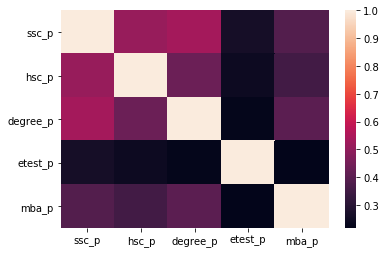

In [71]:
sns.heatmap(data.corr())

In [77]:
x = data.drop(columns='status')
y = pd.DataFrame(data['status'])

# Decision Tree

In [72]:
x_enc = pd.get_dummies(x, drop_first=True)
x_enc.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0


In [107]:
print('Placed: {}, Not placed: {}'.format(sum(y.status=='Placed'), sum(y.status=='Not Placed')))

Placed: 148, Not placed: 67


In [109]:
sum(data[y.status=='Placed'].ssc_p<=56.44)

4

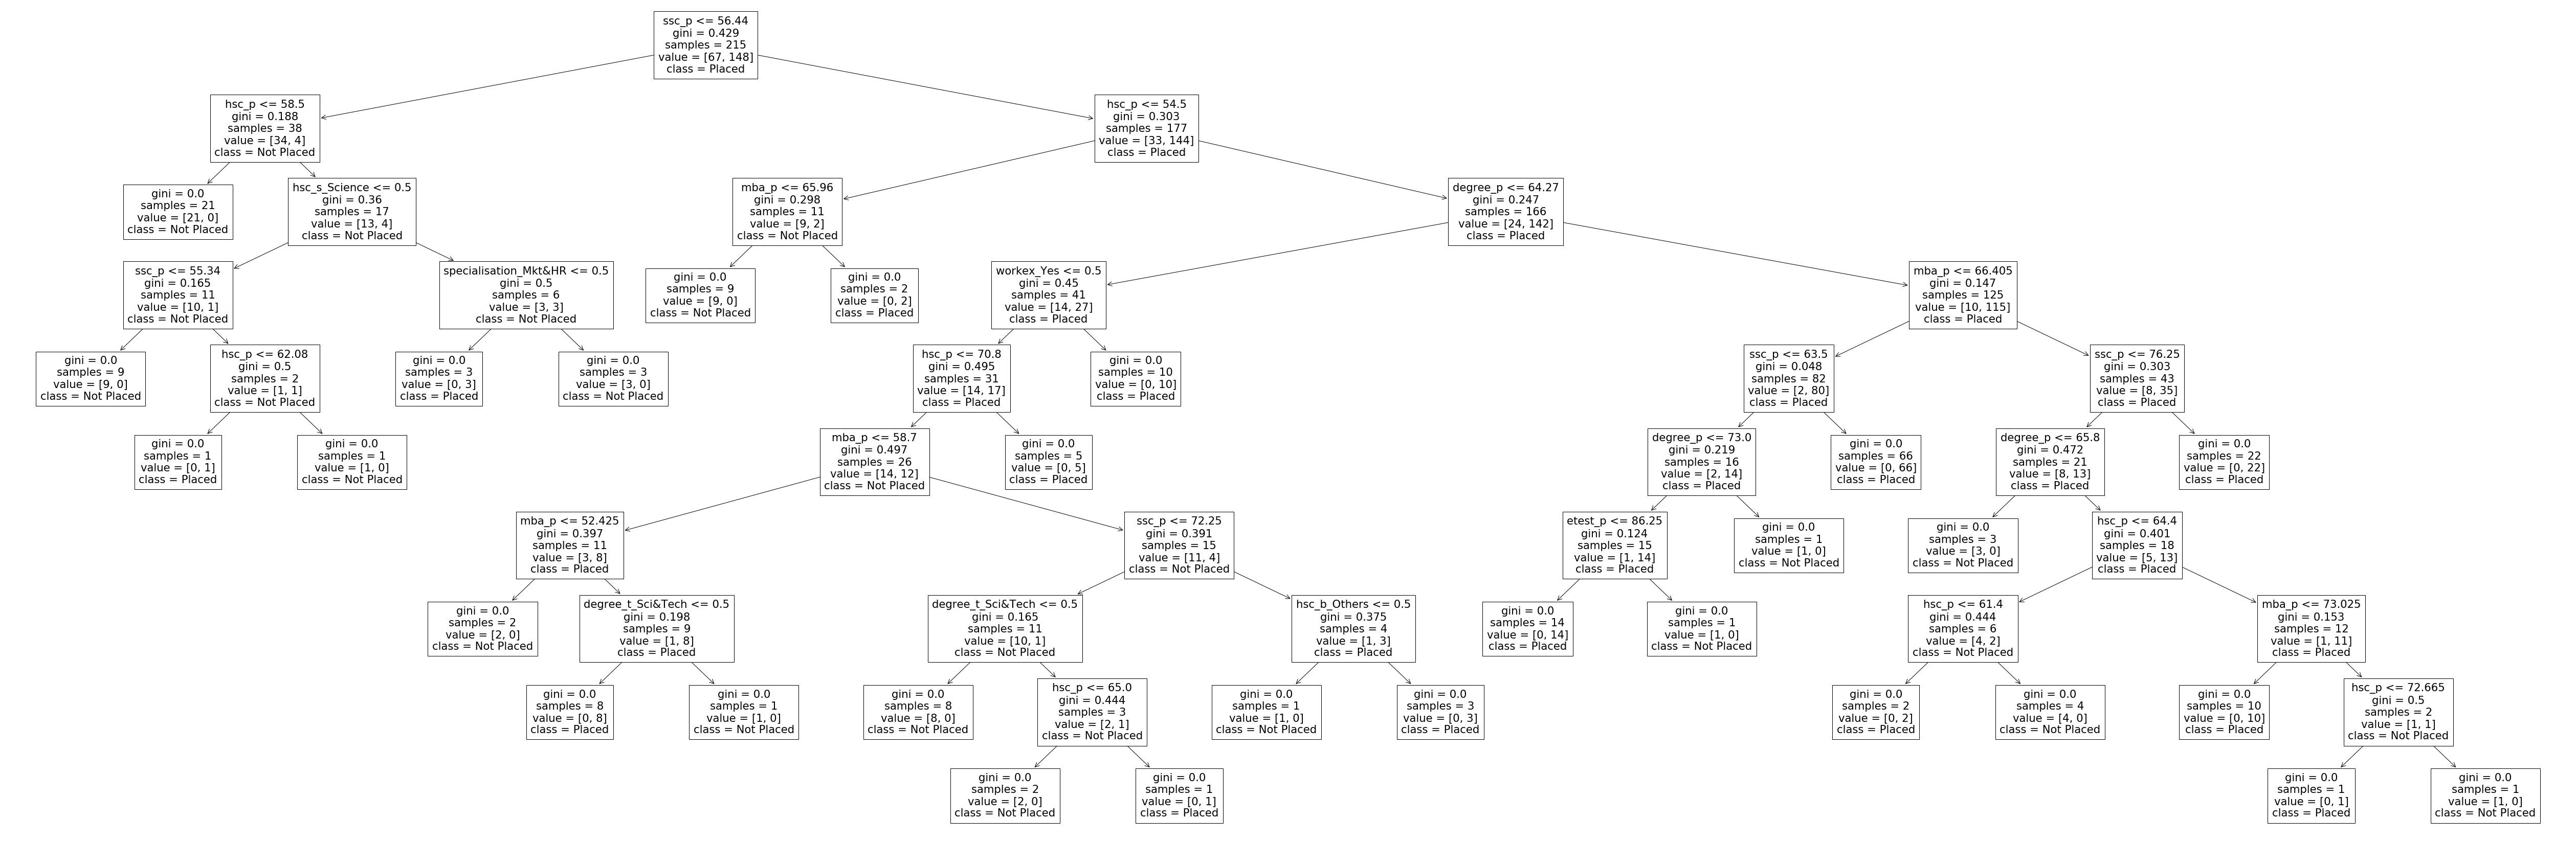

In [110]:
clf = tree.DecisionTreeClassifier()
tr = clf.fit(x_enc,y)
fig = plt.figure(figsize=(90,30))
t=tree.plot_tree(tr, feature_names=x_enc.columns, class_names=['Not Placed', 'Placed'])
plt.savefig('tree.png')